Plain Monte Carlo Estimate: 1.9828
MCMC Estimate: 2.4603


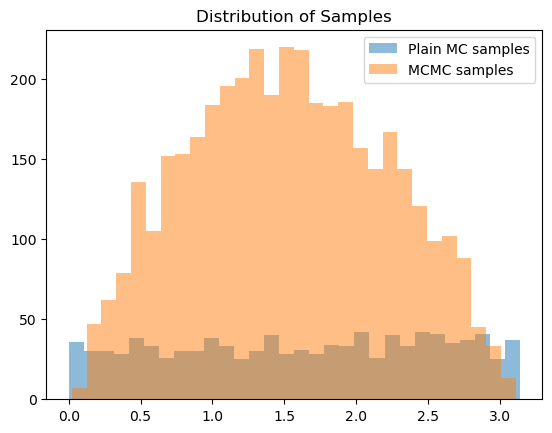

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to integrate
def f(x):
    return np.sin(x)

# Integration bounds
a, b = 0, np.pi

# --- Plain Monte Carlo Sampling ---
N = 1000  # number of random samples

# Generate N independent uniform random samples
x_samples = np.random.uniform(a, b, N)
# Compute function values and estimate integral
mc_estimate = (b - a) * np.mean(f(x_samples))

print(f"Plain Monte Carlo Estimate: {mc_estimate:.4f}")

# --- Simple MCMC Sampling ---
# We will use a Metropolis algorithm to sample from PDF proportional to sin(x)

def target_pdf(x):
    # Probability proportional to sin(x) in [0, pi], zero elsewhere
    return np.sin(x) if 0 <= x <= np.pi else 0

mcmc_samples = []
current_x = np.pi / 2  # start at middle of domain
steps = 5000
burn_in = 1000

for i in range(steps):
    # Propose a new point from a normal distribution centered on current_x
    proposal = np.random.normal(current_x, 0.5)
    # Calculate acceptance ratio
    p_current = target_pdf(current_x)
    p_proposal = target_pdf(proposal)
    acceptance_ratio = p_proposal / p_current if p_current > 0 else 1
    
    # Accept or reject proposal
    if acceptance_ratio >= 1 or np.random.rand() < acceptance_ratio:
        current_x = proposal
    
    if i >= burn_in:
        mcmc_samples.append(current_x)

# Estimate integral by weighting each MCMC point by the interval length (pi-0)
# The expected value of x under the distribution proportional to sin(x) would approximate integral normalized,
# but for this example we'll estimate integral as the average value of f(x) in samples weighted by domain length
mcmc_estimate = (b - a) * np.mean(f(np.array(mcmc_samples)))

print(f"MCMC Estimate: {mcmc_estimate:.4f}")

# Visualization
plt.hist(x_samples, bins=30, alpha=0.5, label='Plain MC samples')
plt.hist(mcmc_samples, bins=30, alpha=0.5, label='MCMC samples')
plt.legend()
plt.title("Distribution of Samples")
plt.show()


Explanation:
The plain Monte Carlo part draws independent uniform samples over the interval and estimates the integral as the average function value times the interval length.

The MCMC part uses the Metropolis algorithm to generate samples from a distribution proportional to 
sin
⁡
(
x
)
sin(x) on 
[
0
,
π
]
[0,π] and uses these samples to estimate the integral.

The histograms show that plain Monte Carlo samples are uniformly distributed while MCMC samples concentrate around regions where 
sin
⁡
(
x
)
sin(x) is larger.

This example illustrates the difference in sampling approaches clearly: independent uniform sampling vs dependent samples generated by a Markov chain that better approximates a complex target distribution.

In [5]:

import arviz as az
import matplotlib.pyplot as plt

# Assuming 'trace' is your MCMC sample object from pymc3, pystan, or similar
# Plot autocorrelation for each parameter
az.plot_autocorr(trace)
plt.show()

# Summary including effective sample size
ess = az.ess(trace)
print(ess)

# Visualization of ESS
az.plot_ess(trace)
plt.show()


NameError: name 'trace' is not defined

In [7]:
!pip install arviz


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.7 MB 6.7 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.7 MB 7.0 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.7 MB 7.0 MB/s eta 0:00:01
   ---------------------------------- ----- 1.5/1.7 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 8.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/50.7 kB ? eta -:--:--
   ---------------------------------------- 50.7/50.7 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ----------------- ---------------------- 0.6/1.3 MB 17.9 MB/s eta 0:00:01
   -------------------------------------- - 1.3/1.3 MB 16.3 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 14.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/66.5 kB ? eta -:--:--
   ------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 25.0 which is incompatible.
